In [2]:
from ultralytics import YOLO
import cv2
# Load a pre-trained YOLOv8 model
model = YOLO('./models/best.pt')
video_path = './Assignment Materials/Assignment Materials/15sec_input_720p.mp4'

In [1]:
!nvidia-smi

Mon Jun 16 01:13:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   61C    P0             16W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import sys
import easyocr
reader = easyocr.Reader(['en'], gpu=True)
# Check if the model is loaded correctly
if model is None:
    print("Error: Model not loaded.")
    sys.exit(1)

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break

    results = model(frame, stream=True)
    for result in results:
        result = result
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            conf = box.conf[0]
            cls = box.cls[0]
            cropped = frame[int(y1):int(y2), int(x1):int(x2)]
            cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
            text = reader.readtext(cropped)
            if len(text)!=0:
                ocr_result = text[0][1]
                cv2.putText(frame, ocr_result, (int(x1), int(y2) + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
                # sys.exit(1)
            label = f"{model.names[int(cls)]} {conf:.2f}"
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    cv2.imshow('YOLOv8 Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        cap.release()
        print("Exiting video stream.")
        break


0: 384x640 1 ball, 16 players, 2 referees, 351.0ms
Speed: 3.8ms preprocess, 351.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 65.7ms
Speed: 2.6ms preprocess, 65.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 63.1ms
Speed: 2.2ms preprocess, 63.1ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 62.0ms
Speed: 1.9ms preprocess, 62.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 63.1ms
Speed: 2.3ms preprocess, 63.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 62.3ms
Speed: 1.6ms preprocess, 62.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 63.4ms
Speed: 2.6ms preprocess, 63.4ms inference, 2.7ms postprocess per image at s

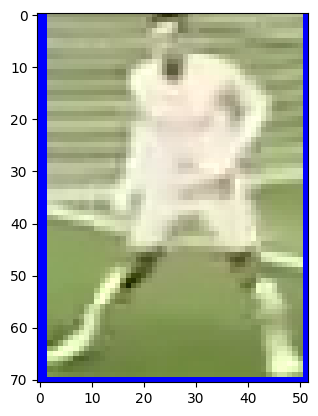

In [8]:
import matplotlib.pyplot as plt

plt.imshow(cropped)